# Step 1: Install Required Libraries

In [2]:
!pip install sentence-transformers==3.0.0
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 91.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.8/792.8 kB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 97.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled to

# Step 2: Download and Prepare the Model
### Define the function to use the embedder model

In [3]:
import numpy as np
import requests from ibm_watson_machine_learning import APIClient

def my_embedding_function():
    from sentence_transformers import SentenceTransformer
    model_name = 'BAAI/bge-m3'  # 이곳에 원하는 모델의 이를을 넣습니다.
    try:
        model = SentenceTransformer(model_name)
    except Exception as e:
        return {"error": str(e)}
    
    def score(payload):
        # we assume only one batch is sent
        sentences = payload['input_data'][0]['values'][0]
        try:
            embeddings = model.encode(sentences)
            return {
                'predictions': [
                    {
                        'fields': ['sentence', 'embedding'],
                        'values': [[sentence, embedding.tolist()] for sentence, embedding in zip(sentences, embeddings)]
                    }
                ]
            }
        except Exception as e:
            return {"error": str(e)}
    return score

# Example usage:
embedding_function = my_embedding_function()

# Example payload
payload = {
    'input_data': [
        {
            'values': [
                ["대한민국의 수도는 서울입니다"]
            ]
        }
    ]
}

result = embedding_function(payload)
print(result)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

{'predictions': [{'fields': ['sentence', 'embedding'], 'values': [['대한민국의 수도는 서울입니다', [0.024721138179302216, 0.048798006027936935, -0.04004622995853424, -0.004252723418176174, -0.008917732164263725, -0.004623297601938248, -0.00917360745370388, -0.03870721533894539, 0.006547398399561644, 0.006323290057480335, -0.03276752308011055, 0.011251426301896572, -0.01457141526043415, -0.007341444958001375, 0.0002041910047410056, 0.01064163539558649, 0.06085023656487465, 0.012711890041828156, -0.026015788316726685, -0.01680392399430275, -0.0053259157575666904, -0.02326080948114395, -0.036682095378637314, -0.022964470088481903, 0.0047627901658415794, 0.0033939217682927847, -0.03482450917363167, -0.005815278273075819, 0.01838374137878418, -0.049057312309741974, -0.019895054399967194, -0.049894530326128006, 0.027981281280517578, -0.012051750905811787, -0.051448192447423935, -0.011888835579156876, -0.034334518015384674, -0.0368274450302124, -0.02475694753229618, 0.013887407258152962, 0.022762980312108

# Step 3: Configure Watson Machine Learning

### Watson Machine Learning 서비스를 인증하고 설정합니다:

In [4]:
url='https://us-south.ml.cloud.ibm.com'
api_key='JEz5IpYegT0bZFwtC4NMrBys7owZsd4Tbodrow3G6HOu'
wml_credentials = {
    "url": url,
    "apikey": api_key
}

client = APIClient(wml_credentials)

space_id = '2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'

client.spaces.list(limit=10)
client.set.default_space(space_id)

------------------------------------  ------------------------  ------------------------
ID                                    NAME                      CREATED
2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797  My Deployment Space       2024-09-19T04:11:28.209Z
9341c602-dab5-42ed-8a6a-43f7a52e774a  Auto policy risk testing  2024-02-19T06:10:51.792Z
------------------------------------  ------------------------  ------------------------


'SUCCESS'

# Step 4: Deploy the Model

In [5]:
%%writefile environment.yml
channels:
  - empty
  - nodefaults
dependencies:
- pip:
  - sentence-transformers==3.0.0

Writing environment.yml


In [22]:
from ibm_watson_machine_learning.wml_client_error import WMLClientError, ApiRequestFailure
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

meta_props = {
   client.package_extensions.ConfigurationMetaNames.NAME: "transformers",
   client.package_extensions.ConfigurationMetaNames.TYPE: "conda_yml"
}
pkg_extn_details = client.package_extensions.store(meta_props, "./environment.yml")
pkg_extn_id = client.package_extensions.get_id(pkg_extn_details)

base_id = client.software_specifications.get_id_by_name("runtime-23.1-py3.10")

spec_name = "custom_sentence_transformer_spec"

meta_props = {
   client.software_specifications.ConfigurationMetaNames.NAME: spec_name,
   client.software_specifications.ConfigurationMetaNames.PACKAGE_EXTENSIONS: [{'guid': pkg_extn_id}],
   client.software_specifications.ConfigurationMetaNames.BASE_SOFTWARE_SPECIFICATION: {'guid': base_id}
}

try:
    # 기존 소프트웨어 사양 확인
    existing_specs = client.software_specifications.get_details()
    existing_spec_names = [spec['metadata']['name'] for spec in existing_specs['resources']]

    # 동일한 이름의 소프트웨어 사양이 이미 시스템에 정의되어 있으면 중복 에러가 발생합니다. 
    if spec_name in existing_spec_names:
        # 기존 사양이 존재하면 삭제
        logger.info(f"Deleting existing software specification: {spec_name}")
        spec_id = client.software_specifications.get_id_by_name(spec_name)
        client.software_specifications.delete(spec_id)        
    
    # 새로운 사양 생성
    logger.info(f"Creating new software specification: {spec_name}")
    sw_spec_details = client.software_specifications.store(meta_props)
    spec_id = client.software_specifications.get_id(sw_spec_details)
    logger.info(f"New software specification created successfully. ID: {spec_id}")
    
    # 소프트웨어 사양 ID 저장
    sw_spec_id = spec_id
    
except ApiRequestFailure as e:
    logger.error(f"API request failed: {e}")
    raise
except Exception as e:
    logger.error(f"An unexpected error occurred: {e}")
    raise


Creating package extensions


INFO:ibm_watson_machine_learning.wml_resource:Successfully finished creating new package_extensions for url: 'https://api.dataplatform.cloud.ibm.com/v2/package_extensions?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


SUCCESS


INFO:ibm_watson_machine_learning.wml_resource:Successfully finished list assets for url: 'https://api.dataplatform.cloud.ibm.com/v2/software_specifications?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797&name=runtime-23.1-py3.10'
INFO:ibm_watson_machine_learning.wml_resource:Successfully finished list assets for url: 'https://api.dataplatform.cloud.ibm.com/v2/software_specifications?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797&name=runtime-23.1-py3.10'
INFO:ibm_watson_machine_learning.wml_resource:Successfully finished get sw specs details for url: 'https://api.dataplatform.cloud.ibm.com/v2/software_specifications?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'
INFO:__main__:Deleting existing software specification: custom_sentence_transformer_spec
INFO:ibm_watson_machine_learning.wml_resource:Successfully finished list assets for url: 'https://api.dataplatform.cloud.ibm.com/v2/software_specifications?version=2024-07-01&space_id=2d

193e38a7-1daf-47e4-9109-ed2575e33c06


In [26]:
# Deployment Space에 function 저장
# 이 코드를 실행하면 위에서 선언된 Deployment Space에 해당 function_name으로 저장되고, watsonx.ai의 Deployments UI의 Asset 텝에서도 실시간으로 반영되는 것을 확인할 수 있습니다.  
function_name = 'bge-m3'

function_props = {
    client.repository.FunctionMetaNames.NAME: function_name,
    client.repository.FunctionMetaNames.SOFTWARE_SPEC_UID: sw_spec_id
}

try:
    # 기존 함수 검색
    existing_functions = client.repository.get_function_details()
    existing_function = next((f for f in existing_functions['resources'] if f['metadata']['name'] == function_name), None)

    if existing_function:
        # 기존 함수가 존재하면 삭제
        existing_function_id = existing_function['metadata']['id']
        logger.info(f"Deleting existing function: {function_name} (ID: {existing_function_id})")
        client.repository.delete(existing_function_id)
        logger.info(f"Existing function deleted successfully")

    # 새 함수 저장
    logger.info(f"Storing new function: {function_name}")
    function_details = client.repository.store_function(my_embedding_function, function_props)
    function_id = client.repository.get_function_id(function_details)
    logger.info(f"New function stored successfully. Function ID: {function_id}")

except ApiRequestFailure as e:
    logger.error(f"API request failed: {e}")
    raise
except Exception as e:
    logger.error(f"An unexpected error occurred: {e}")
    raise

print(f"Function ID: {function_id}, " + f"Function Name: {function_name}" )

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished functions for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/functions?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797&limit=200'
INFO:__main__:Deleting existing function: bge-m3 (ID: 862c1976-dd81-4e08-8071-a5fcce8512ab)
INFO:ibm_watson_machine_learning.wml_resource:Successfully finished Get deployment details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments?asset_id=862c1976-dd81-4e08-8071-a5fcce8512ab&version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'
INFO:__main__:Existing function deleted successfully
INFO:__main__:Storing new function: bge-m3
INFO:ibm_watson_machine_learning.wml_resource:Successfully finished saving function for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/functions?version=2024-07-01'
INFO:ibm_watson_machine_learning.wml_resource:Successfully finished saving function content for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/functions/a913e255-56ca-402

Function ID: a913e255-56ca-402c-9ea6-3cf9282566a9, Function Name: bge-m3


#### 위 코드를 실행하면 아래와 같이 Deployments Space에 python function 자산이 등록됩니다.

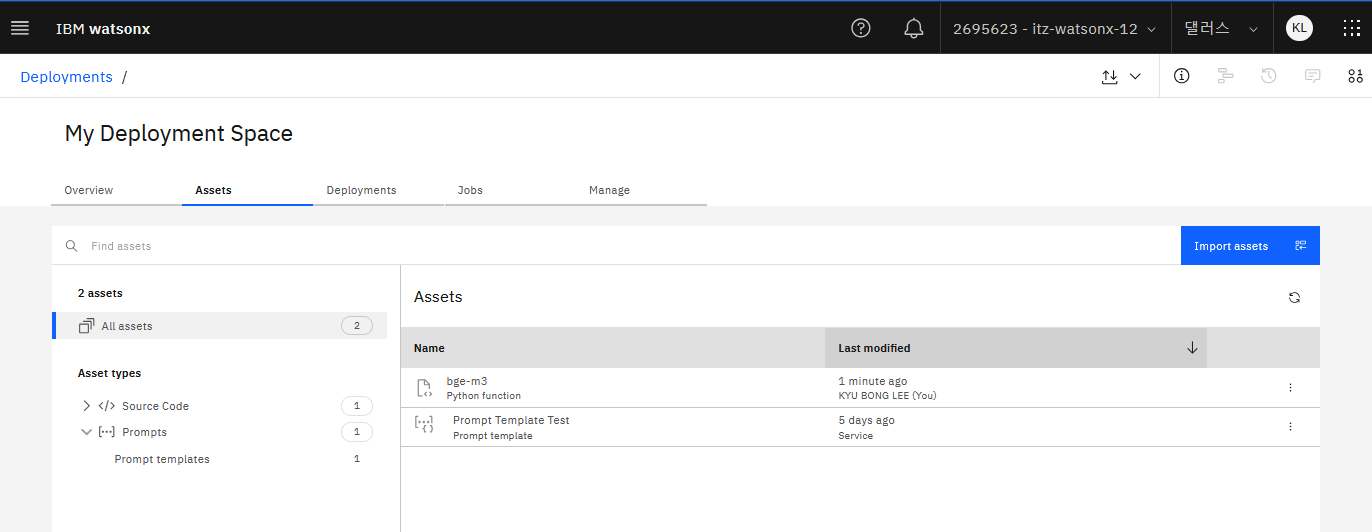

#### 모델 배포를 생성하면 배포가 완료되면 공간에 표시됩니다:

In [27]:
hardware_spec_id = client.hardware_specifications.get_id_by_name('M')

deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME: 'bge-m3',
    client.deployments.ConfigurationMetaNames.ONLINE: {},
    client.deployments.ConfigurationMetaNames.HARDWARE_SPEC: { "id": hardware_spec_id, 'num_nodes': 1}
}

deployment_details = client.deployments.create(function_id, deployment_props)
deployment_id = client.deployments.get_id(deployment_details)

payload = {
    'input_data': [
        {
            'values': [
                ["대한민국의 수도는 서울입니다"]
            ]
        }
    ]
}

result = client.deployments.score(deployment_id, payload)
print(result)

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished list assets for url: 'https://api.dataplatform.cloud.ibm.com/v2/hardware_specifications?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797&name=M'
INFO:ibm_watson_machine_learning.wml_resource:Successfully finished list assets for url: 'https://api.dataplatform.cloud.ibm.com/v2/hardware_specifications?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797&name=M'




#######################################################################################

Synchronous deployment creation for uid: 'a913e255-56ca-402c-9ea6-3cf9282566a9' started

#######################################################################################


initializing

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'



Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.
.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'


.

INFO:ibm_watson_machine_learning.wml_resource:Successfully finished getting deployments details for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d?version=2024-07-01&space_id=2df5a7ab-8e9e-4cb8-9fe7-dc1b69519797'



ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='3b875092-7921-4822-9c85-9fa9251d1a0d'
------------------------------------------------------------------------------------------------




INFO:ibm_watson_machine_learning.wml_resource:Successfully finished scoring for url: 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3b875092-7921-4822-9c85-9fa9251d1a0d/predictions?version=2024-07-01'


{'predictions': [{'fields': ['sentence', 'embedding'], 'values': [['대한민국의 수도는 서울입니다', [0.024721158668398857, 0.04879799857735634, -0.040046218782663345, -0.00425266707316041, -0.00891772098839283, -0.0046233246102929115, -0.009173644706606865, -0.03870725631713867, 0.006547410506755114, 0.0063233086839318275, -0.032767537981271744, 0.011251396499574184, -0.014571355655789375, -0.007341472897678614, 0.0002041742845904082, 0.010641617700457573, 0.06085025146603584, 0.012711867690086365, -0.02601579576730728, -0.016803914681077003, -0.005325919482856989, -0.023260798305273056, -0.03668210282921791, -0.0229644812643528, 0.0047627598978579044, 0.003393922932446003, -0.03482452780008316, -0.005815235432237387, 0.01838373951613903, -0.049057286232709885, -0.01989503763616085, -0.04989452287554741, 0.027981245890259743, -0.012051759287714958, -0.05144822224974632, -0.011888861656188965, -0.034334514290094376, -0.036827459931373596, -0.02475697174668312, 0.013887373730540276, 0.0227629467844963

#### 위 코드를 실행하면 watsonx.ai의 Deployment Space에서 아래와 같이 Deploy가 됩니다 

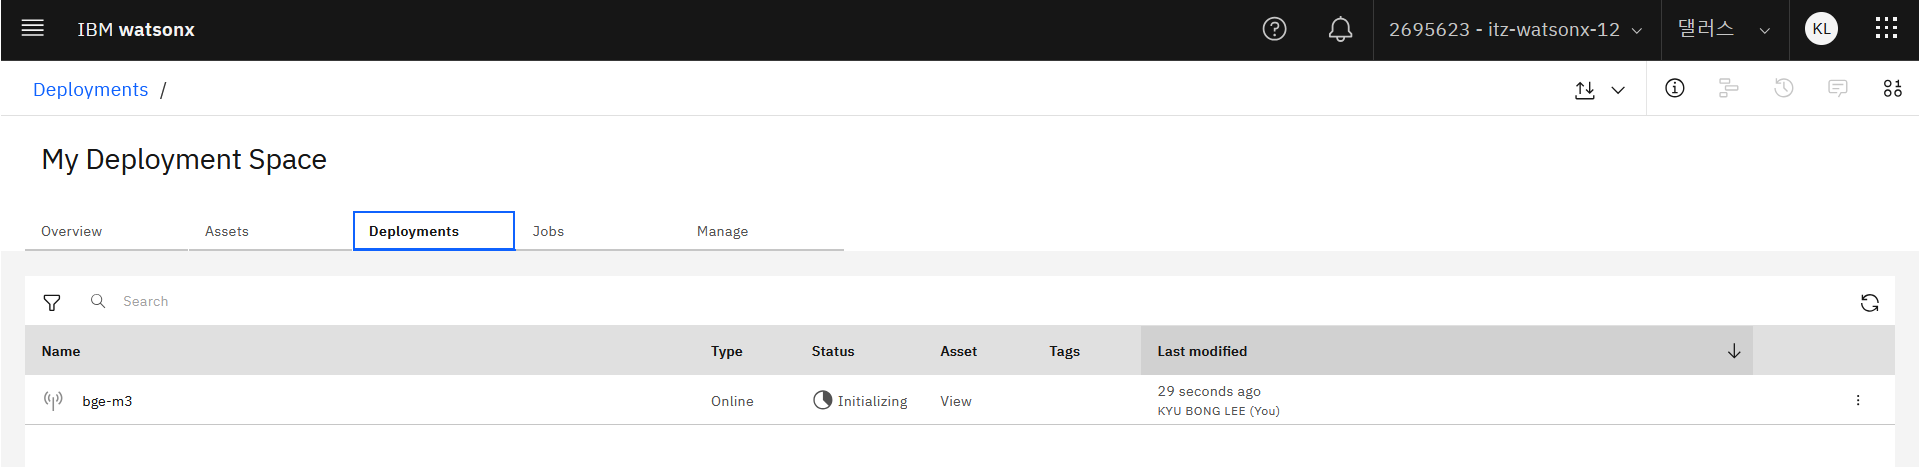

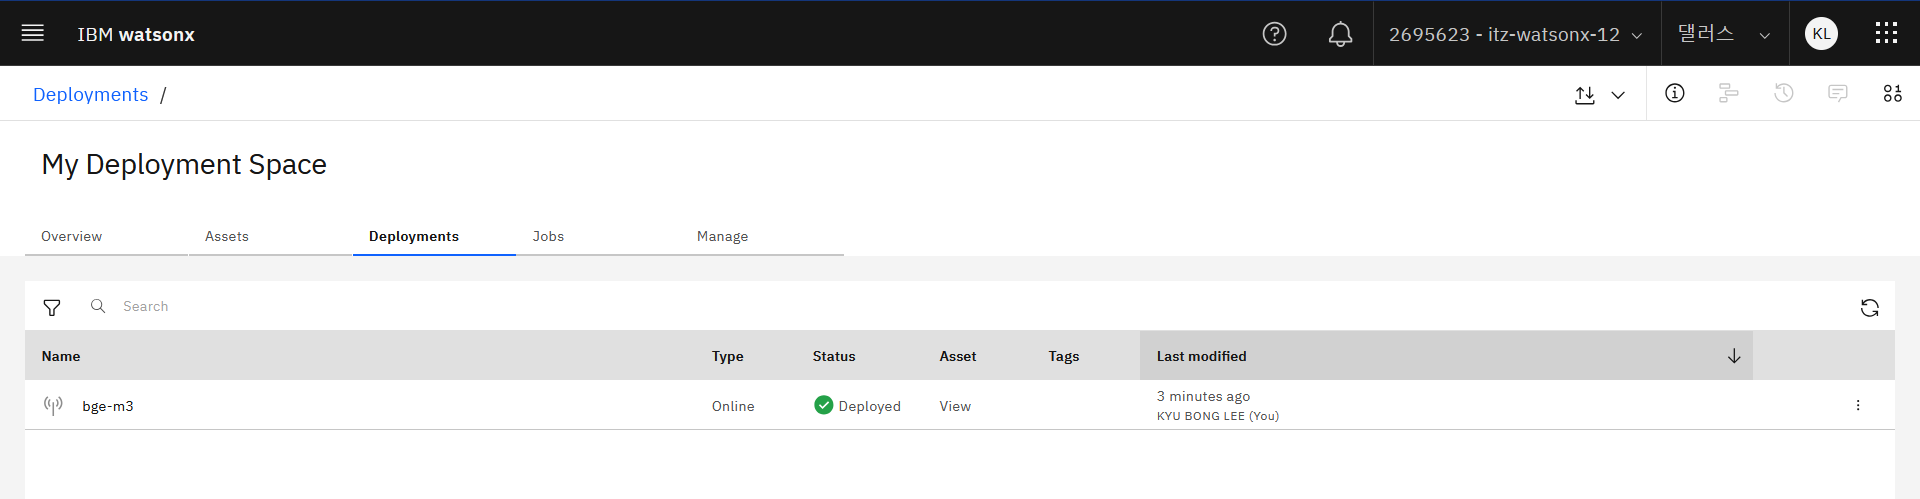

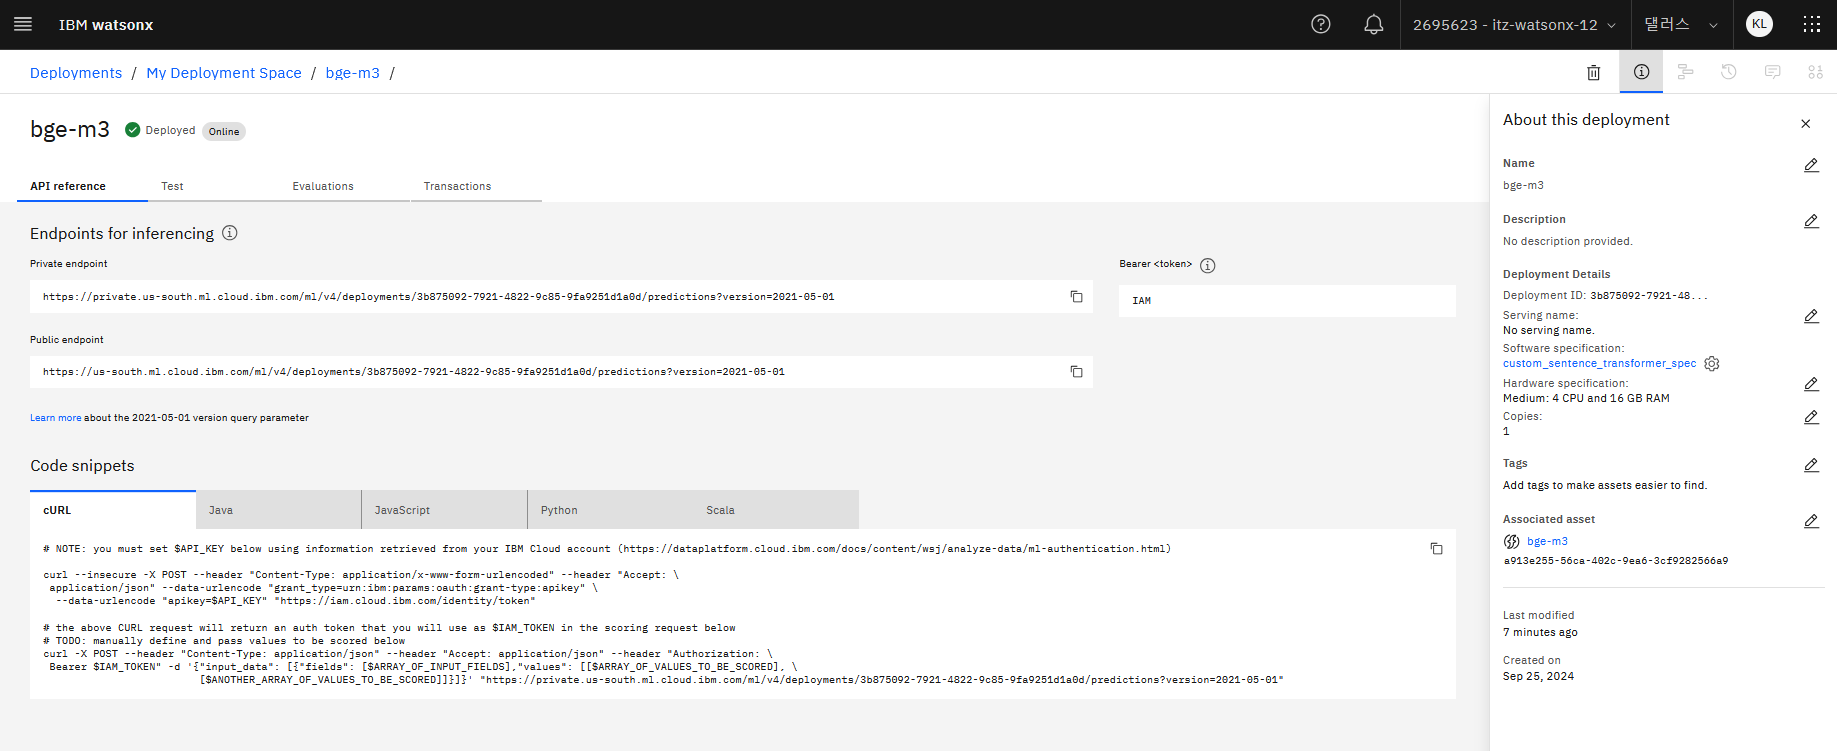

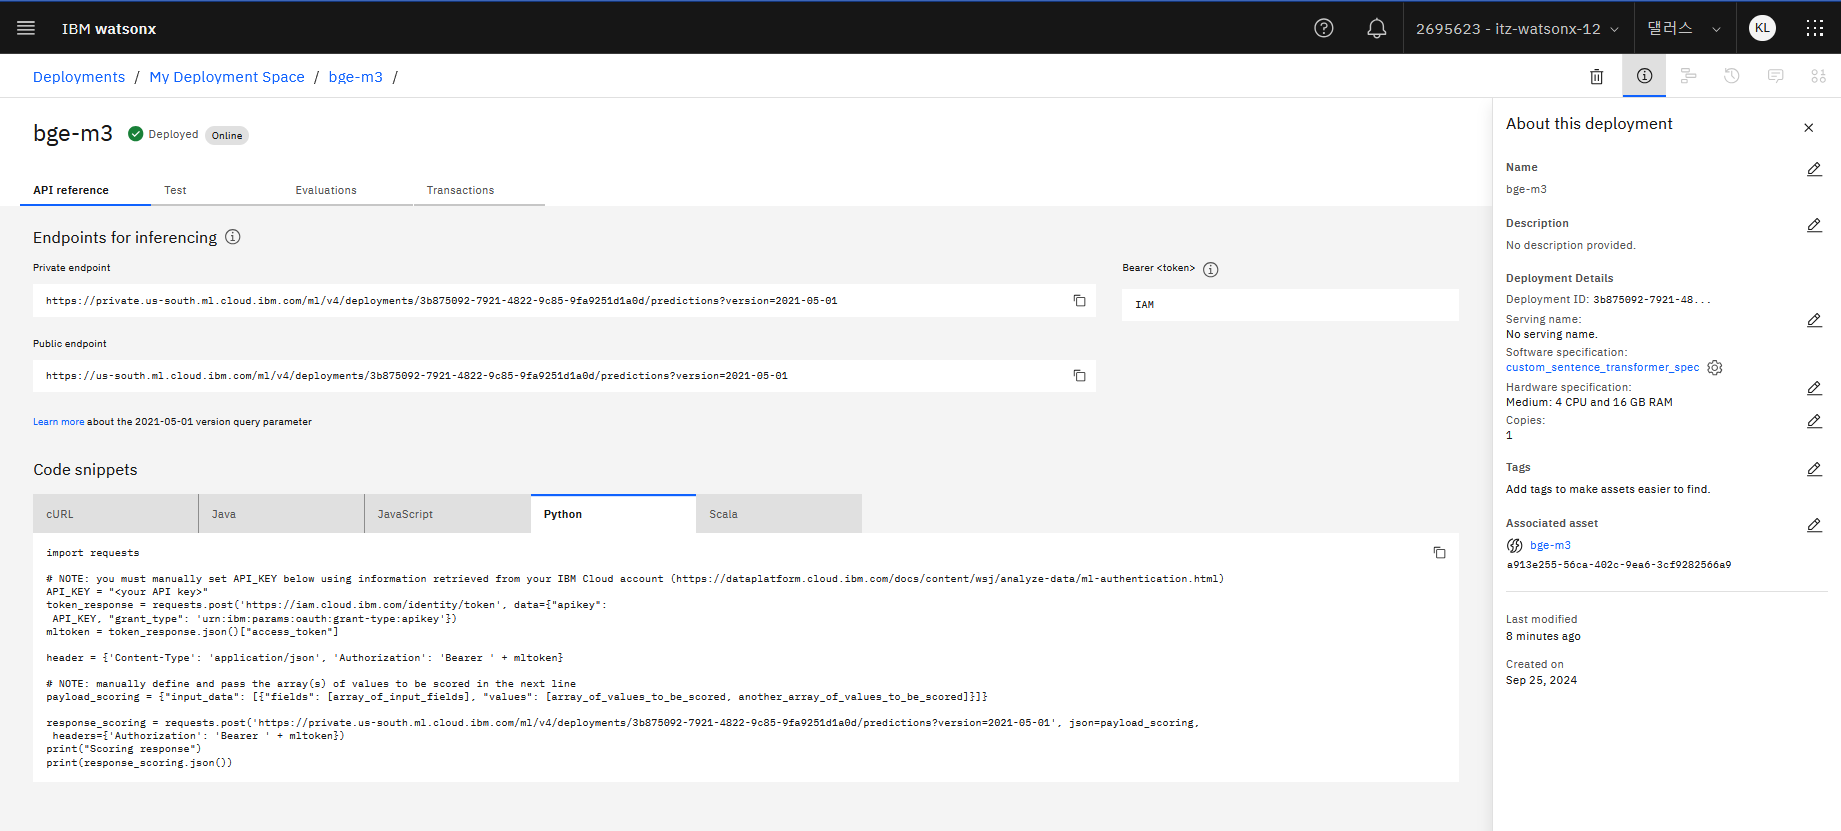

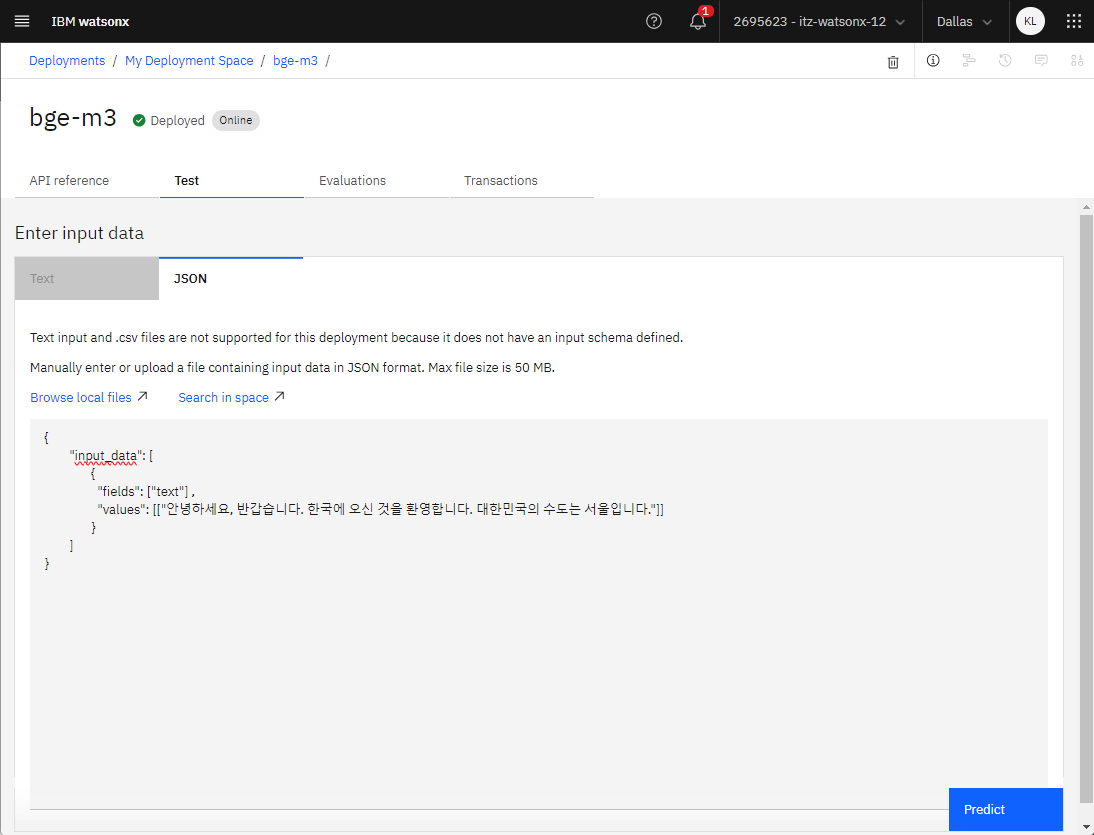

{
        "input_data": [
               {
                 "fields": ["text"] , 
                 "values": [["안녕하세요, 반갑습니다. 한국에 오신 것을 환영합니다. 대한민국의 수도는 서울입니다."]]
               } 
        ]
}

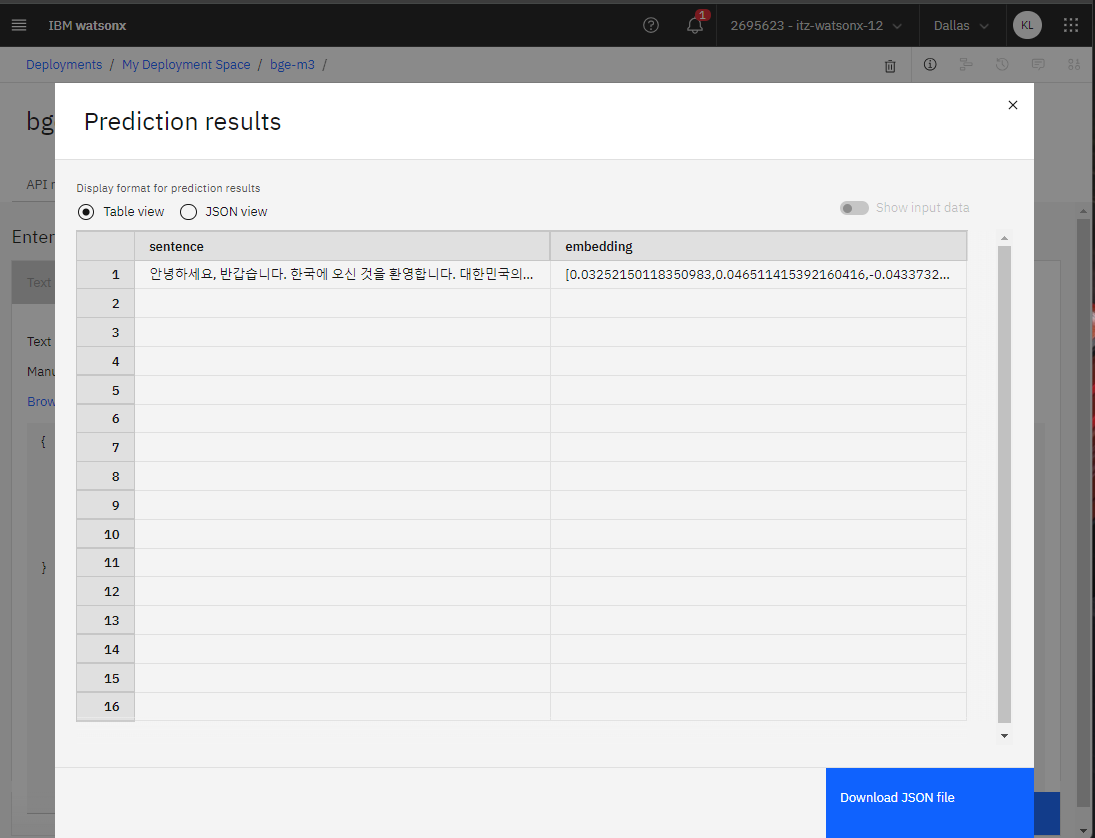